In [147]:
# imports for plotting
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from random import randint

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV

import tensorflow.compat.v2 as tf
from tensorflow.keras.optimizers import SGD

In [107]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

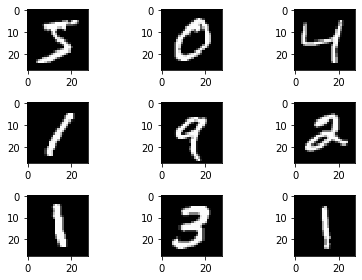

In [108]:
# plotting some images
for i in range(9):
    ax = plt.subplot(330 +i+1)
    plt.tight_layout()
    #ax.axis('off')
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    #plt.imshow(X_train[randint(0, X_train.shape[0])], cmap='gray', interpolation='none')
    #plt.savefig('output/legend.png')

we could see that our dataset consists of small square 28 * 28 pixel grayscale of handwritten digits between 0 and 9. The training dataset has 60,000 squares while the testing dataset has 10,000 squares. 

In [109]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Note: Each image has 28 rows and 28 columns. 
One method is to convert the 2-D array to 1-D array by making one big input vector. But when we do so, we lose the spatial features, i.e., the arrangement of pixels in an image.

In [143]:
# building the input vector from the 28x28 pixels
trainX = X_train.reshape(60000, 784)
testX = X_test.reshape(10000, 784)
trainX = trainX.astype('float32')
testX = testX.astype('float32')


# Normalize the data:
trainX /= 255
testX /= 255


# we have 10 classes
num_class = 10
trainY = np_utils.to_categorical(y_train, num_class)
testY = np_utils.to_categorical(y_test, num_class)

n_cols = 784

model = Sequential()

# Add the first layer 
input_layer = Dense(units = 60, activation='relu', input_shape= (n_cols,))
model.add(input_layer) 

# # Add the second layer 
hidden_layer = Dense(units = 60, activation='sigmoid') 
model.add(hidden_layer)


# # Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 60)                47100     
                                                                 
 dense_94 (Dense)            (None, 60)                3660      
                                                                 
 dense_95 (Dense)            (None, 10)                610       
                                                                 
Total params: 51,370
Trainable params: 51,370
Non-trainable params: 0
_________________________________________________________________


The total number of parameters in a given layer = number of nodes * number of features/n_cols + number of nodes. So for the first layer, the total number of parameters = 60 * 784 + 60

In [111]:
history = model.fit(trainX, trainY, epochs=5, batch_size=128, verbose=2)

Epoch 1/5
469/469 - 1s - loss: 0.6226 - accuracy: 0.8497 - 866ms/epoch - 2ms/step
Epoch 2/5
469/469 - 1s - loss: 0.2241 - accuracy: 0.9384 - 706ms/epoch - 2ms/step
Epoch 3/5
469/469 - 1s - loss: 0.1632 - accuracy: 0.9532 - 587ms/epoch - 1ms/step
Epoch 4/5
469/469 - 1s - loss: 0.1321 - accuracy: 0.9615 - 579ms/epoch - 1ms/step
Epoch 5/5
469/469 - 1s - loss: 0.1106 - accuracy: 0.9676 - 644ms/epoch - 1ms/step


## Convolution neural network

In [144]:
# building the input vector from the 28x28 pixels
trainX_n = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX_n = X_test.reshape((X_test.shape[0], 28, 28, 1))
trainX_n = trainX_n.astype('float32')
testX_n = testX_n.astype('float32')


# Normalize the data:
trainX_n /= 255
testX_n /= 255

print(trainX_n.shape)
print(testX_n.shape)

trainX_n = trainX_n.astype('float32')
testX_n = testX_n.astype('float32')


# we have 10 classes
num_class = 10
trainY_n = np_utils.to_categorical(y_train, num_class)
testY_n = np_utils.to_categorical(y_test, num_class)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


Note: our data is 28 * 28 pixel with no color. 

In [145]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28, 28, 1))) # we first added a small filter (size 3*3) and also a small number of filters(32)
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(60, activation='relu'))
cnn.add(Dense(10, activation='softmax')) # we have 10 digits to classify. (the total number of classes is 10)
opt = SGD(learning_rate=0.01, momentum=0.9)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # we use 'categorical-crossentropy' for multi-class classification

cnn.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_96 (Dense)            (None, 60)                376380    
                                                                 
 dense_97 (Dense)            (None, 10)                610       
                                                                 
Total params: 377,310
Trainable params: 377,310
Non-trainable params: 0
_______________________________________________

In [148]:
help(Conv2D)

Help on class Conv2D in module keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(*args, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers or `None`, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`. You can use `None` when
 |  a dimension has variable size.
 |  
 |  Examples:
 |  
 |  >>> # The inputs are 28x28 RGB images with `channels_last` and the batch
 |  >>> # size is 4.
 |  >>> input_shape = (4, 28, 28, 3)
 |  >>> x = tf.random.normal(input_shap

In [146]:
history_new = cnn.fit(trainX_n, trainY_n, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 18s - loss: 0.2488 - accuracy: 0.9228 - 18s/epoch - 10ms/step
Epoch 2/5
1875/1875 - 20s - loss: 0.0799 - accuracy: 0.9763 - 20s/epoch - 11ms/step
Epoch 3/5
1875/1875 - 19s - loss: 0.0517 - accuracy: 0.9842 - 19s/epoch - 10ms/step
Epoch 4/5
1875/1875 - 19s - loss: 0.0389 - accuracy: 0.9880 - 19s/epoch - 10ms/step
Epoch 5/5
1875/1875 - 20s - loss: 0.0293 - accuracy: 0.9909 - 20s/epoch - 10ms/step
